<a href="https://colab.research.google.com/github/Ioln/DataIoannis/blob/DataNBA/DataNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*DATANBA*

Pesquisando e fazendo gráficos sobre a maior liga de basquete do mundo.

In [ ]:
import requests
import pandas as pd


url = 'https://stats.nba.com/stats/leaguegamelog'
headers= {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Referer': 'https://www.nba.com/'}
payload = {
    'Counter': '1000',
    'DateFrom': '',
    'DateTo': '',
    'Direction': 'DESC',
    'LeagueID': '00',
    'PlayerOrTeam': 'T',
    'Season': '2022-23',
    'SeasonType': 'Regular Season',
    'Sorter': 'DATE'}

jsonData = requests.get(url, headers=headers, params=payload).json()


rows = jsonData['resultSets'][0]['rowSet']
columns = jsonData['resultSets'][0]['headers']

df = pd.DataFrame(rows, columns=columns)

Uma pequena olhadela no nosso DataSet

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          110 non-null    object 
 1   TEAM_ID            110 non-null    int64  
 2   TEAM_ABBREVIATION  110 non-null    object 
 3   TEAM_NAME          110 non-null    object 
 4   GAME_ID            110 non-null    object 
 5   GAME_DATE          110 non-null    object 
 6   MATCHUP            110 non-null    object 
 7   WL                 110 non-null    object 
 8   MIN                110 non-null    int64  
 9   FGM                110 non-null    int64  
 10  FGA                110 non-null    int64  
 11  FG_PCT             110 non-null    float64
 12  FG3M               110 non-null    int64  
 13  FG3A               110 non-null    int64  
 14  FG3_PCT            110 non-null    float64
 15  FTM                110 non-null    int64  
 16  FTA                110 non

Agora, vamos ver quantos times na atual temporada da NBA teve mais de 120 pontos em uma partida

In [ ]:
dft = df.query('PTS >= 120')

dft

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1610612756,PHX,Phoenix Suns,0022200055,2022-10-25,PHX vs. GSW,W,240,47,...,34,48,31,8,4,14,19,134,29,1
7,22022,1610612764,WAS,Washington Wizards,0022200052,2022-10-25,WAS vs. DET,W,240,44,...,38,47,26,7,7,12,20,120,21,1
8,22022,1610612757,POR,Portland Trail Blazers,0022200051,2022-10-24,POR vs. DEN,W,240,48,...,36,45,23,3,6,10,14,135,25,1
12,22022,1610612763,MEM,Memphis Grizzlies,0022200049,2022-10-24,MEM vs. BKN,W,240,47,...,26,38,21,7,3,9,22,134,10,1
13,22022,1610612751,BKN,Brooklyn Nets,0022200049,2022-10-24,BKN @ MEM,L,240,47,...,26,35,27,4,7,11,30,124,-10,1
14,22022,1610612741,CHI,Chicago Bulls,0022200047,2022-10-24,CHI vs. BOS,W,240,42,...,46,60,29,4,6,14,18,120,18,1
22,22022,1610612755,PHI,Philadelphia 76ers,0022200044,2022-10-24,PHI vs. IND,W,240,38,...,32,39,25,8,7,8,20,120,14,1
28,22022,1610612758,SAC,Sacramento Kings,0022200042,2022-10-23,SAC @ GSW,L,240,47,...,38,51,31,10,2,16,29,125,-5,1
29,22022,1610612744,GSW,Golden State Warriors,0022200042,2022-10-23,GSW vs. SAC,W,240,45,...,31,37,24,7,5,13,21,130,5,1
34,22022,1610612762,UTA,Utah Jazz,0022200040,2022-10-23,UTA @ NOP,W,265,43,...,29,44,29,13,6,17,20,122,1,1


Quantas vezes o time teve uma partida de +60 Rebotes na atual temporada da NBA

In [ ]:
dfteam = df['TEAM_NAME'][df['REB'] >= 60].value_counts()
dfteam

Oklahoma City Thunder     1
Chicago Bulls             1
Minnesota Timberwolves    1
Memphis Grizzlies         1
New Orleans Pelicans      1
Name: TEAM_NAME, dtype: int64

Quantas vezes aconteceu de um time ter + de 35 assistências

In [ ]:
dft = df.query('AST >= 35')
dft

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
16,22022,1610612759,SAS,San Antonio Spurs,0022200050,2022-10-24,SAS @ MIN,W,240,48,...,36,50,37,11,0,13,21,115,9,1
62,22022,1610612762,UTA,Utah Jazz,0022200025,2022-10-21,UTA @ MIN,W,265,49,...,35,54,39,11,8,13,23,132,6,1


Agora, vamos dar uma olhada na carreira do Lebron James. Para isso, vamos utilizar uma API

In [ ]:
pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 9.4 MB/s 


E dessa API a gente importa os jogadores, e escolhemos o jogador que queremos ver. No nosso caso é o Lebron James.

In [ ]:
from nba_api.stats.static import players

#players we want to look into
superstars = ['Lebron James']

#initialize empty lists that will put player id into
player_ids = []
for i in superstars:
    player_ids.append(players.find_players_by_full_name(i)[0]['id'])

In [ ]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
import pandas as pd 

#pull game logs of each player
game_logs =[]
for i in player_ids:
    game_logs.append(playergamelog.PlayerGameLog(player_id=i, season = SeasonAll.all).get_data_frames()[0])

player_data = dict(zip(superstars, game_logs))

#Enter any player from superstar list to access their game log
dfp = player_data['Lebron James']

Agora aqui, temos os dados de todos os jogos da carreira do Lebron James.

In [ ]:
dfp

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,2544,0022200037,"OCT 23, 2022",LAL vs. POR,L,38,12,22,0.545,...,7,8,8,2,2,4,3,31,2,1
1,22022,2544,0022200016,"OCT 20, 2022",LAL vs. LAC,L,37,7,17,0.412,...,8,10,6,1,2,2,3,20,-1,1
2,22022,2544,0022200002,"OCT 18, 2022",LAL @ GSW,L,35,12,26,0.462,...,10,15,8,0,0,5,2,31,-10,1
3,22021,2544,0022101160,"APR 01, 2022",LAL vs. NOP,L,40,13,23,0.565,...,8,8,4,1,0,6,3,38,-2,1
4,22021,2544,0022101119,"MAR 27, 2022",LAL @ NOP,L,42,14,27,0.519,...,8,9,5,0,1,4,1,39,-9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,22003,2544,0020300068,"NOV 07, 2003",CLE @ IND,L,44,8,18,0.444,...,5,5,3,0,0,7,2,23,-7,0
1365,22003,2544,0020300057,"NOV 05, 2003",CLE vs. DEN,L,41,3,11,0.273,...,9,11,7,2,3,2,1,7,-3,0
1366,22003,2544,0020300038,"NOV 01, 2003",CLE @ POR,L,39,3,12,0.250,...,4,4,6,2,0,2,3,8,-21,0
1367,22003,2544,0020300018,"OCT 30, 2003",CLE @ PHX,L,41,8,17,0.471,...,10,12,8,1,0,7,1,21,-3,0


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

Observando agora num gráfico de dispersão os Pontos e os Rebotes do Lebron em todas as partidas.

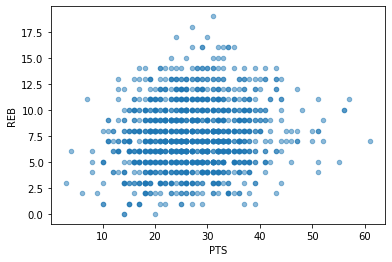

In [ ]:
dfp.plot.scatter(x="PTS", y = "REB", alpha = 0.5)

Agora separando em cores quantas vezes o Lebron teve X pontos, com dessa vez utilizando o percentual de FG% em todas as partidas

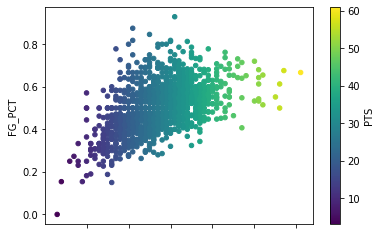

In [ ]:
ax2 = dfp.plot.scatter(x='PTS',
...                       y='FG_PCT',
...                       c='PTS',
...                       colormap='viridis')

O basquete pós Stephen CURRY se adaptou para utilizar mais a bola de 3, e nós podemos reparar como o Lebron ao decorrer do tempo se tornou também um Shooter.

In [ ]:
count = dfp.groupby('SEASON_ID')['FG3M'].mean() #Contagem dos IDs das amostragens de acordo com os IDs de espécies
count.head() #As cinco primeiras entradas do objeto 'count'

SEASON_ID
22003    0.797468
22004    1.350000
22005    1.607595
22006    1.269231
22007    1.506667
Name: FG3M, dtype: float64

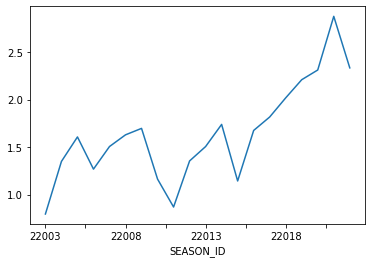

In [ ]:
count.plot() #Plotagem de um gráfico de barras do objeto 'count', com tamanho (18, 3)

Dando uma pesquisada no nosso DataSet, agora vamos ver quantas vezes o Lebron teve + de 35 pontos em uma partida.

In [ ]:
dfp1 = dfp.query('PTS >= 35')
dfp1

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
3,22021,2544,0022101160,"APR 01, 2022",LAL vs. NOP,L,40,13,23,0.565,...,8,8,4,1,0,6,3,38,-2,1
4,22021,2544,0022101119,"MAR 27, 2022",LAL @ NOP,L,42,14,27,0.519,...,8,9,5,0,1,4,1,39,-9,1
5,22021,2544,0022101072,"MAR 21, 2022",LAL @ CLE,W,41,17,29,0.586,...,9,10,12,1,1,3,0,38,9,1
6,22021,2544,0022101061,"MAR 19, 2022",LAL @ WAS,L,36,16,29,0.552,...,8,10,6,0,0,2,3,38,1,1
7,22021,2544,0022101051,"MAR 18, 2022",LAL @ TOR,W,45,15,26,0.577,...,5,9,7,0,2,3,2,36,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,22004,2544,0020400063,"NOV 10, 2004",CLE vs. PHX,W,48,13,24,0.542,...,7,10,6,3,3,3,1,38,14,0
1300,22003,2544,0020301050,"MAR 27, 2004",CLE vs. NJN,W,43,15,29,0.517,...,4,6,13,3,0,2,1,41,10,0
1325,22003,2544,0020300680,"FEB 01, 2004",CLE @ WAS,W,43,14,27,0.519,...,3,6,4,0,2,6,4,38,0,0
1343,22003,2544,0020300360,"DEC 19, 2003",CLE @ PHI,W,42,14,24,0.583,...,3,4,5,4,0,4,1,36,9,0
